<a href="https://colab.research.google.com/github/gunelatakishyeva/DeepLearningProjects/blob/main/introduction_to_computer_vision_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref=zipfile.ZipFile('/content/pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-07-24 15:01:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.3MB/s    in 5.9s    

2024-07-24 15:01:09 (17.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train

pizza  steak


In [ ]:
import os

for dirpath,dirnames,filenames in os.walk('pizza_steak'):
  print(f'There are{len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are2 directories and 0 images in pizza_steak.
There are2 directories and 0 images in pizza_steak/train.
There are0 directories and 750 images in pizza_steak/train/pizza.
There are0 directories and 750 images in pizza_steak/train/steak.
There are2 directories and 0 images in pizza_steak/test.
There are0 directories and 250 images in pizza_steak/test/pizza.
There are0 directories and 250 images in pizza_steak/test/steak.


In [ ]:
num_steak_images_train=len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')
data_dir

PosixPath('pizza_steak/train')

In [ ]:
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [ ]:
import pathlib
import numpy as np
data_dir=pathlib.Path('pizza_steak/train')

for item in data_dir.glob('*'):
  print(item,'  ',item.name)

pizza_steak/train/pizza    pizza
pizza_steak/train/steak    steak


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=mpimg.imread(target_folder+'/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img


Image shape: (384, 512, 3)


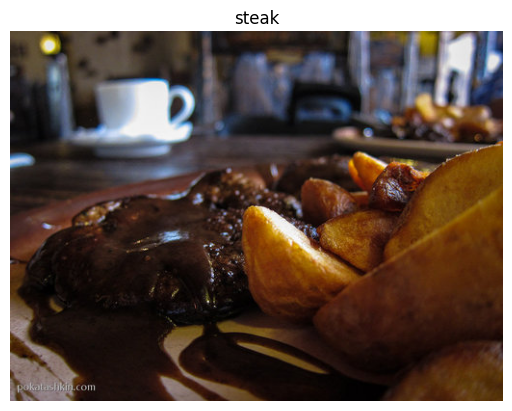

In [ ]:
img=view_random_image(target_dir='pizza_steak/train/',
                      target_class='steak')

Image shape: (512, 512, 3)


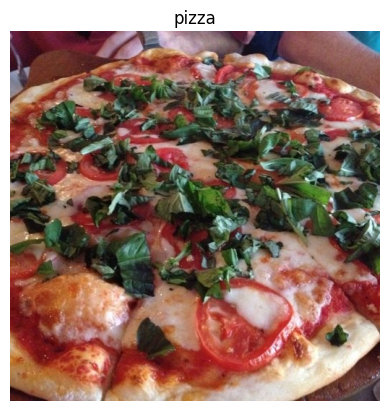

In [ ]:
img=view_random_image(target_dir='pizza_steak/train/',
                      target_class='pizza')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

train_dir='/content/pizza_steak/train'
test_dir='/content/pizza_steak/test'

train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)
valid_data= valid_datagen.flow_from_directory(test_dir, # Use the validation data generator
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             seed=42)

model_1=tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu',kernel_initializer='he_normal',input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.MaxPool2D(pool_size=2,padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Conv2D(10,3,activation='relu',kernel_initializer='he_normal'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='linear')
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

history=model_1.fit(train_data,epochs=5,
                    validation_data=valid_data)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 14s 146ms/step - loss: 0.8533 - accuracy: 0.5833 - val_loss: 0.6220 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.5121 - accuracy: 0.7520 - val_loss: 0.4305 - val_accuracy: 0.8060
Epoch 3/5
21/47 [============>.................] - ETA: 2s - loss: 0.3733 - accuracy: 0.8144

In [ ]:
model_1.summary()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

In [ ]:
len(train_data.next()[0])

In [ ]:
image,labels=train_data.next()

In [ ]:
from tensorflow .keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

In [ ]:
model_4=Sequential([
    Conv2D(filters=10,kernel_size=3,strides=1,padding='valid',activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_4=model_4.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 164ms/step - loss: 0.7039 - accuracy: 0.7220 - val_loss: 0.3857 - val_accuracy: 0.8440
Epoch 2/5
47/47 [==============================] - 6s 117ms/step - loss: 0.4265 - accuracy: 0.8093 - val_loss: 0.4297 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3294 - accuracy: 0.8713 - val_loss: 0.3599 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.2106 - accuracy: 0.9327 - val_loss: 0.3545 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.1158 - accuracy: 0.9687 - val_loss: 0.3899 - val_accuracy: 0.8220


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 91ms/step - loss: 0.3899 - accuracy: 0.8220


[0.389889121055603, 0.8220000267028809]

In [ ]:
history_4.history

{'loss': [0.7038803696632385,
  0.42650076746940613,
  0.32938528060913086,
  0.21059608459472656,
  0.11580459773540497],
 'accuracy': [0.722000002861023,
  0.809333324432373,
  0.8713333606719971,
  0.9326666593551636,
  0.968666672706604],
 'val_loss': [0.38574543595314026,
  0.4296858310699463,
  0.3599405288696289,
  0.35450661182403564,
  0.3898891508579254],
 'val_accuracy': [0.843999981880188,
  0.7979999780654907,
  0.8539999723434448,
  0.8240000009536743,
  0.8220000267028809]}

<Axes: >

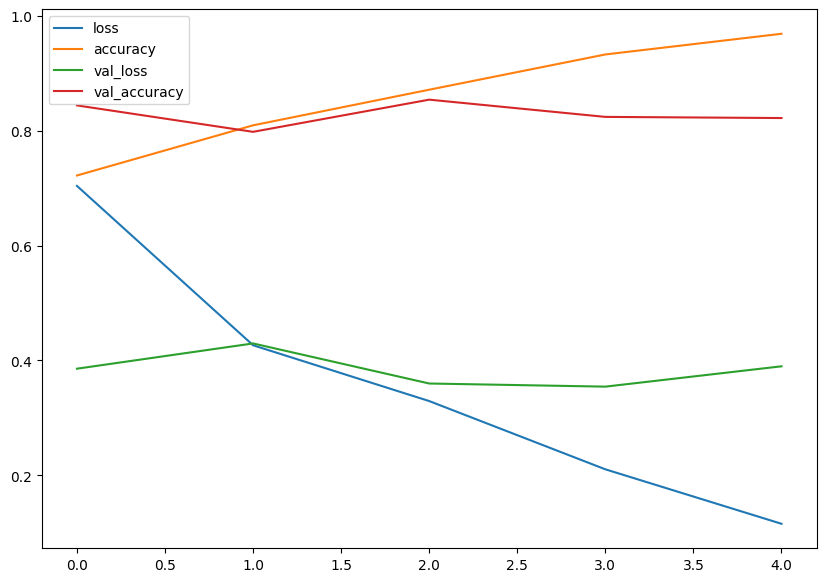

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [ ]:
def plot_loss_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']
  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']
  epochs=range(len(history.history['loss']))

  plt.plot(epochs,loss,label='training_loss')
  plt.plot(epochs,val_loss,label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label='training_accuracy')
  plt.plot(epochs,val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

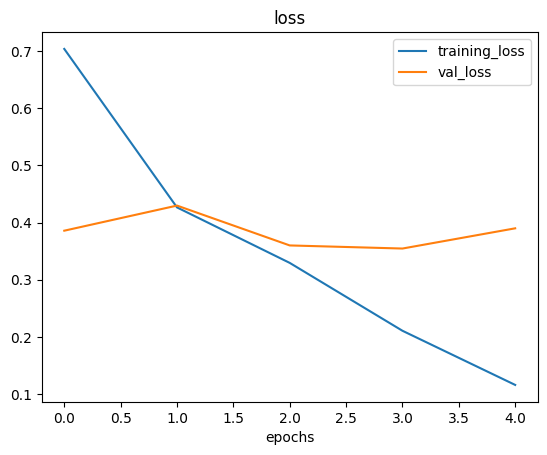

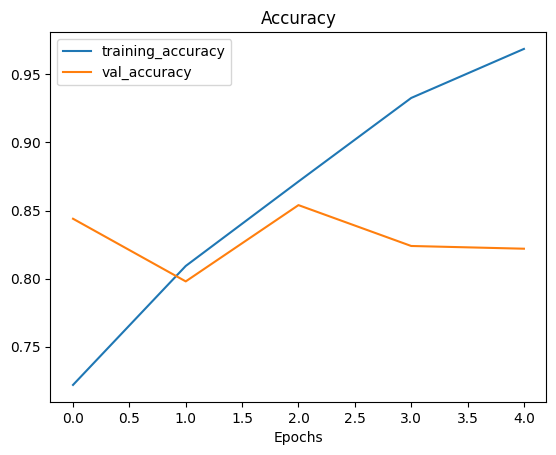

In [ ]:
plot_loss_curves(history_4)

In [ ]:
model_5=Sequential([
    Conv2D(10,3,activation='relu',input_shape=[224,224,3]),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
history_5=model_5.fit(train_data,
                      steps_per_epoch=len(train_data),
                      epochs=5,
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 127ms/step - loss: 0.6167 - accuracy: 0.6447 - val_loss: 0.4463 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 8s 167ms/step - loss: 0.4570 - accuracy: 0.7933 - val_loss: 0.4182 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 5s 111ms/step - loss: 0.4309 - accuracy: 0.8120 - val_loss: 0.3665 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 6s 126ms/step - loss: 0.4077 - accuracy: 0.8227 - val_loss: 0.3759 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 5s 107ms/step - loss: 0.3856 - accuracy: 0.8287 - val_loss: 0.3457 - val_accuracy: 0.8520


In [ ]:
model_5.evaluate(test_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.3457 - accuracy: 0.8520


[0.34570086002349854, 0.8519999980926514]

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1/255.,
                                           rotation_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           width_shift_range=0.2,
                                           height_shift_range=0.2,
                                           horizontal_flip=True)

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [ ]:
print('Train data augmented')
train_data_augmented=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                 target_size=(224,224),
                                                                 class_mode='binary',
                                                                 batch_size=32,
                                                                 shuffle=False)
print('Non-augmented train data')
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32,
                                             shuffle=False)
IMG_size=(224,224)
print('NON-augmented test data:')
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode='binary',
                                             batch_size=32)

Train data augmented
Found 1500 images belonging to 2 classes.
Non-augmented train data
Found 1500 images belonging to 2 classes.
NON-augmented test data:
Found 500 images belonging to 2 classes.


In [ ]:
images,labels=train_data.next()

augmented_images,augmented_labels=train_data_augmented.next()

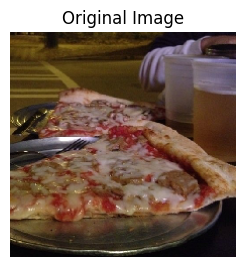

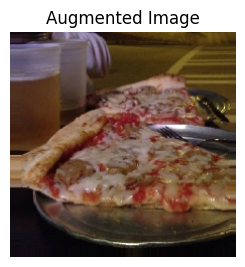

In [ ]:
import random
random_number=random.randint(1,31)
plt.subplot(1,2,1)
plt.imshow(images[random_number])
plt.title('Original Image')
plt.axis(False)
plt.show()
plt.figure()
plt.subplot(1,2,2)
plt.imshow(augmented_images[random_number])
plt.title('Augmented Image')
plt.axis(False)
plt.show()


In [ ]:
model_6=Sequential([
    Conv2D(filters=10,kernel_size=3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,activation='relu'),
    MaxPool2D(2),
    Conv2D(filters=10,kernel_size=3,activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(1,activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_6=model_6.fit(train_data_augmented,epochs=5,
                    steps_per_epoch=len(train_data_augmented),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 410ms/step - loss: 0.7069 - accuracy: 0.3900 - val_loss: 0.6909 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 22s 477ms/step - loss: 0.6899 - accuracy: 0.5540 - val_loss: 0.6750 - val_accuracy: 0.6740
Epoch 3/5
47/47 [==============================] - 19s 413ms/step - loss: 0.6786 - accuracy: 0.5453 - val_loss: 0.6517 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6773 - accuracy: 0.6107 - val_loss: 0.6608 - val_accuracy: 0.6340
Epoch 5/5
47/47 [==============================] - 19s 413ms/step - loss: 0.6737 - accuracy: 0.5733 - val_loss: 0.6244 - val_accuracy: 0.7120
